# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [1]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [2]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


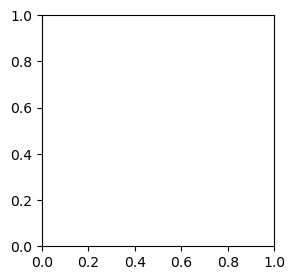

In [3]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

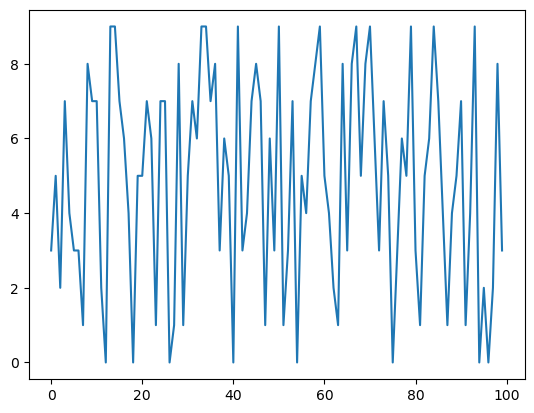

In [4]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

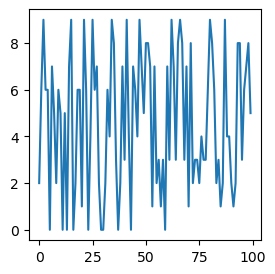

In [5]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

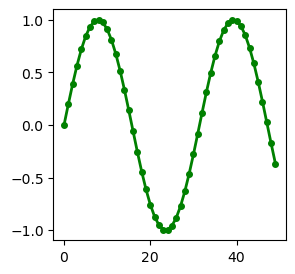

In [6]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

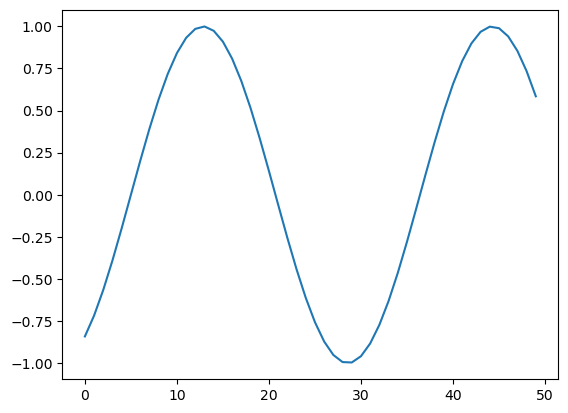

In [7]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


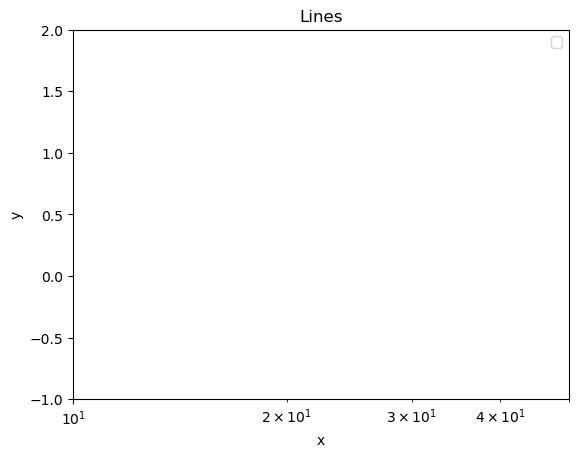

In [8]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

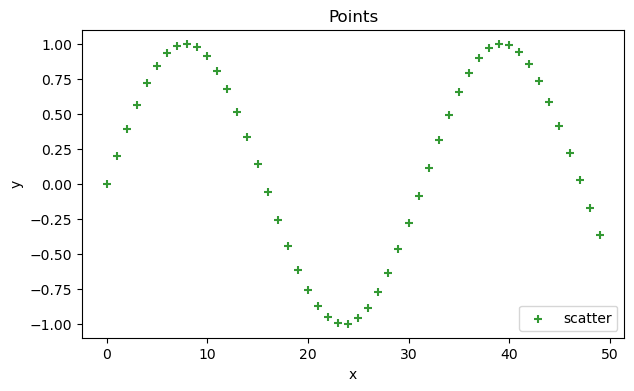

In [9]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

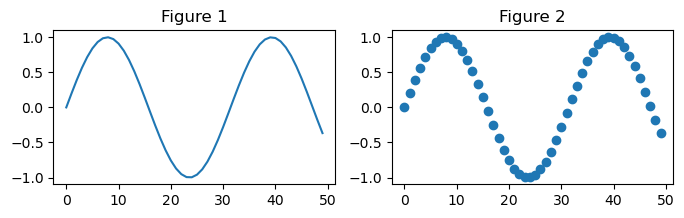

In [10]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

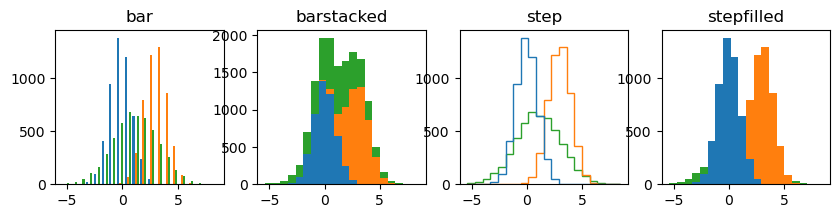

In [11]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

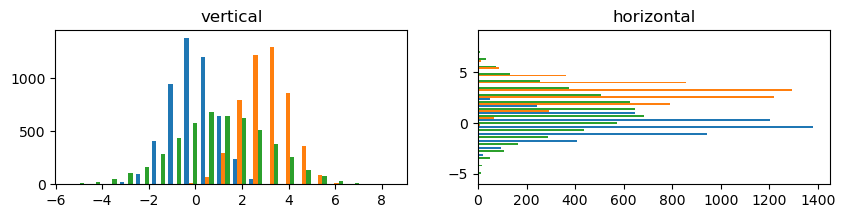

In [12]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [13]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.866780,0.998423,0.073137,0.756987,0.975962,0.171800,0.040063,0.597767,0.427409,0.923837
1,0.640811,0.276310,0.619519,0.544443,0.828216,0.219967,0.999059,0.103506,0.770258,0.924075
2,0.399648,0.479706,0.246745,0.367270,0.142913,0.708799,0.724078,0.875005,0.734358,0.600028
3,0.460194,0.918393,0.158699,0.933322,0.725335,0.719278,0.677316,0.291058,0.353648,0.518673
4,0.515606,0.910439,0.110409,0.924931,0.131113,0.041402,0.317925,0.277566,0.376268,0.115109


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

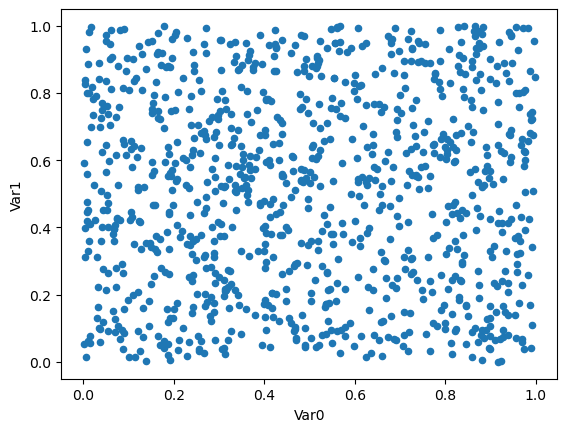

In [14]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

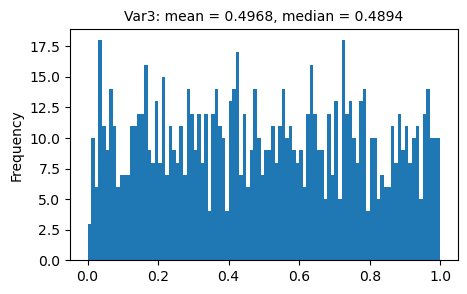

In [15]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

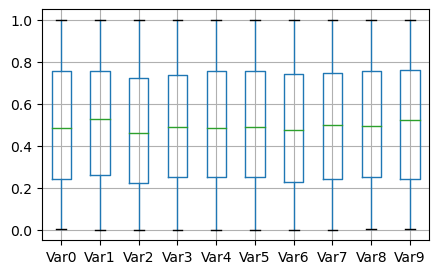

In [16]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

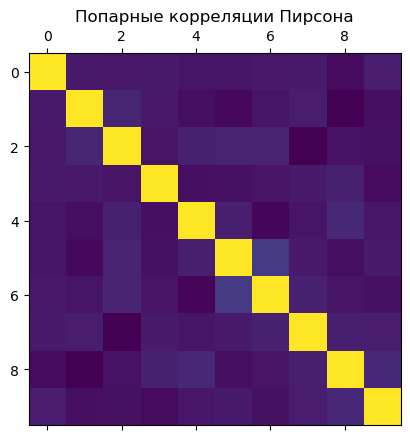

In [17]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

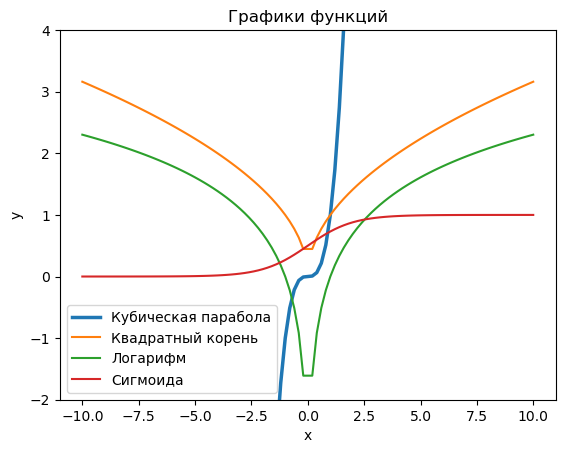

In [18]:
x = np.linspace(-10, 10, 101)
x = x[x != 0]

y_cubic = x ** 3
y_sqrt = np.sqrt(np.abs(x))
y_log = np.log(np.abs(x))
y_sigma = 1 / (1 + np.exp(-x))

plt.plot(x, y_cubic, label='Кубическая парабола', linewidth = 2.5)
plt.plot(x, y_sqrt, label='Квадратный корень')
plt.plot(x, y_log, label='Логарифм')
plt.plot(x, y_sigma, label='Сигмоида')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функций')

plt.ylim(-2, 4)
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [19]:
means = np.random.uniform(size=50)
stds = np.random.uniform(size=50)

df = pd.DataFrame(data=np.random.normal(loc=means, scale=stds, size=(1000, 50)), columns=['Var'+str(i) for i in range(50)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49
0,1.190708,0.484715,0.302692,0.356031,-0.797202,0.057215,0.934422,0.802537,1.095831,0.952537,...,0.542462,0.453515,0.484136,0.289746,0.880833,-0.943559,0.656707,1.053645,1.306558,0.443361
1,-0.673913,1.363991,0.315283,0.204846,0.096464,0.924360,0.286452,-0.197042,1.020312,0.775950,...,0.563201,0.912740,-0.221404,0.414241,-0.500351,0.358260,0.740139,0.765472,1.358455,0.248112
2,-0.159896,1.024314,-0.958665,0.524220,-0.092877,1.124150,0.673218,2.152845,1.151064,-0.148393,...,0.592695,0.778205,0.182064,0.041237,0.602543,-0.264182,0.808777,0.393496,1.323041,0.171074
3,0.735010,0.494004,-0.026570,0.342836,-0.228382,2.230076,1.459334,0.912112,0.563161,-0.072398,...,1.483651,0.467894,0.781009,0.861887,-0.028094,-0.122413,0.689806,-0.233933,1.329134,0.869632
4,0.195036,1.001693,-0.558422,0.470340,1.073498,1.718732,0.387118,0.296805,1.048355,0.903096,...,1.553815,0.775723,1.046697,0.773465,0.327864,1.517166,0.460819,0.938598,1.351212,0.577901


3. Определите медианы и стандартные отклонения для всех колонок.

In [20]:
median = df.median()
std = df.std()
print(median, std)

Var0     0.376007
Var1     0.820880
Var2     0.119449
Var3     0.465559
Var4     0.042150
Var5     0.817041
Var6     0.647952
Var7     0.633535
Var8     0.749183
Var9     0.474763
Var10    0.141413
Var11    0.121443
Var12    0.574051
Var13    0.711978
Var14    0.323565
Var15    0.763282
Var16    0.824861
Var17    0.618646
Var18    0.847747
Var19    0.583706
Var20    0.507305
Var21    0.685027
Var22    0.357214
Var23    0.274634
Var24    0.381311
Var25    0.133076
Var26    0.718696
Var27    0.743428
Var28    0.705251
Var29    0.050338
Var30    0.197732
Var31    0.841005
Var32    0.767242
Var33    0.070460
Var34    0.382821
Var35    0.925412
Var36    0.728703
Var37    0.877577
Var38    0.357638
Var39    0.007269
Var40    0.962019
Var41    0.216572
Var42    0.262247
Var43    0.659317
Var44    0.298928
Var45    0.045302
Var46    0.656519
Var47    0.704365
Var48    0.997033
Var49    0.605063
dtype: float64 Var0     0.607236
Var1     0.523757
Var2     0.676557
Var3     0.290078
Var4     0.53

4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

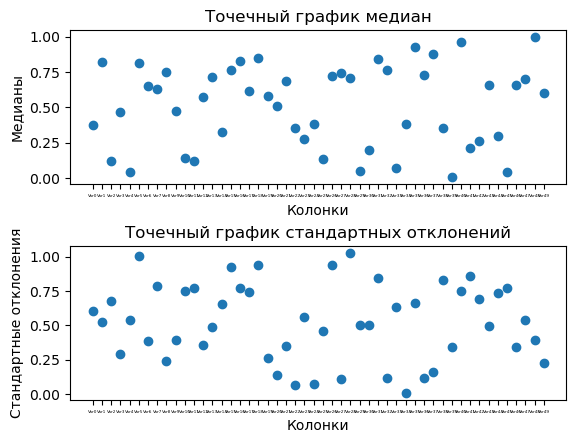

In [21]:
plt.subplot(2,1,1)
plt.scatter(x=median.index, y=median.values)
plt.xlabel('Колонки')
plt.ylabel('Медианы')
plt.title('Точечный график медиан')
plt.xticks(fontsize=3)
plt.subplot(2,1,2)
plt.scatter(x=std.index, y=std.values)
plt.xlabel('Колонки')
plt.ylabel('Стандартные отклонения')
plt.title('Точечный график стандартных отклонений')
plt.xticks(fontsize=3)
plt.subplots_adjust(hspace=0.4)
plt.show()

5. Постройте boxplot для любых 10 колонок.

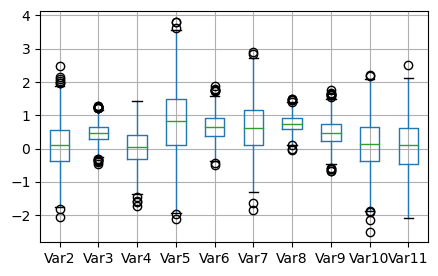

In [22]:
plt.figure(figsize=(5,3))
df.iloc[:, 2:12].boxplot(column = list(df.iloc[:, 2:12].columns))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [25]:
df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(1000)]).T, columns=['Var'+str(i) for i in range(1000)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var990,Var991,Var992,Var993,Var994,Var995,Var996,Var997,Var998,Var999
0,0.215999,0.512946,0.123434,0.237176,0.387543,0.334607,0.265760,0.524514,0.545487,0.929721,...,0.617278,0.042567,0.127319,0.068243,0.896194,0.262161,0.595618,0.545164,0.151287,0.954083
1,0.034151,0.741647,0.981241,0.734189,0.217372,0.738017,0.418108,0.843243,0.141908,0.427803,...,0.472375,0.144640,0.558329,0.011876,0.966953,0.657692,0.548329,0.636791,0.305072,0.074721
2,0.768578,0.748237,0.767327,0.271504,0.071310,0.565442,0.038198,0.436413,0.969428,0.254714,...,0.581773,0.356854,0.021896,0.281902,0.192539,0.158751,0.195149,0.026460,0.170959,0.417712
3,0.776021,0.598845,0.370397,0.699841,0.797774,0.702521,0.377848,0.839221,0.866946,0.177774,...,0.195357,0.411414,0.918165,0.685868,0.268067,0.747882,0.844506,0.153747,0.794465,0.629276
4,0.078280,0.274149,0.955326,0.688573,0.974614,0.751887,0.326837,0.315571,0.297599,0.311192,...,0.441203,0.121131,0.716436,0.838117,0.077876,0.224569,0.615007,0.041669,0.314168,0.857998


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

In [55]:
correlation = df.corr()
series_correlation = correlation.abs().unstack()
filtered_series_correlation = series_correlation.where(series_correlation < 1)
print(filtered_series_correlation.nlargest(8)[::2])

Var821  Var866    0.159174
Var675  Var897    0.146786
Var110  Var755    0.145485
Var447  Var503    0.141512
dtype: float64


8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

<function matplotlib.pyplot.show(close=None, block=None)>

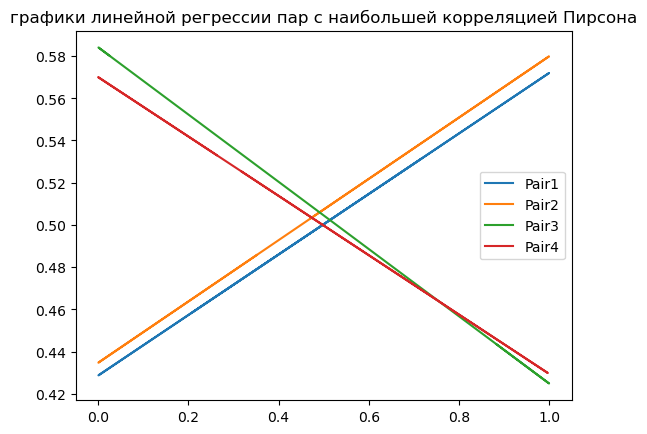

In [56]:
m, b = np.polyfit(df['Var675'], df['Var897'], 1)
plt.plot(df['Var675'], m*df['Var675'] + b, label='Pair1')
m, b = np.polyfit(df['Var110'], df['Var755'], 1)
plt.plot(df['Var110'], m*df['Var110'] + b, label='Pair2')
m, b = np.polyfit(df['Var821'], df['Var866'], 1)
plt.plot(df['Var821'], m*df['Var821'] + b, label='Pair3')
m, b = np.polyfit(df['Var447'], df['Var503'], 1)
plt.plot(df['Var447'], m*df['Var447'] + b, label='Pair4')
#plt.scatter(df['Var675'], df['Var897'], label='Pair1')
#plt.scatter(df['Var110'], df['Var775'], label='Pair2')
#plt.scatter(df['Var358'], df['Var689'], label='Pair3')
#plt.scatter(df['Var220'], df['Var762'], label='Pair4')
plt.title('графики линейной регрессии пар с наибольшей корреляцией Пирсона')
plt.legend()
plt.show

9. Сделайте вывод о скоррелированности этих случайных величин.

In [58]:
print('Чем ближе значение корреляции к 1 (или -1), тем сильнее корееляция. В моем случае получилось, что корреляции равны +-0.15, значит корреляция есть, но очень слабая.Первые 2 пары(по графику) имеют слабую положительную корреляцию, последние 2 - слабую отрицательную.')

Чем ближе значение корреляции к 1 (или -1), тем сильнее корееляция. В моем случае получилось, что корреляции равны +-0.15, значит корреляция есть, но очень слабая.Первые 2 пары(по графику) имеют слабую положительную корреляцию, последние 2 - слабую отрицательную.


## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")